In [2]:
import requests
import json
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt

In [4]:
ELDORA_COORDINATES = "39.93646991379455,-105.58600635354678"
API_URL = "https://api.weather.gov/points/"
ELDORA_URL = API_URL + ELDORA_COORDINATES

In [5]:
%matplotlib inline

In [8]:
overview_page = json.loads(requests.get(ELDORA_URL).text)
hourly_target_url = json.dumps(overview_page['properties']['forecastHourly'], indent=4)[1:-1]
forecast_page = json.loads(requests.get(hourly_target_url).text)
print(hourly_target_url)
hourly_forecast = forecast_page['properties']['periods']

https://api.weather.gov/gridpoints/BOU/42,71/forecast/hourly


In [144]:
tomorrow = datetime.today() + timedelta(days=1)

In [152]:
temps = []
winds = []
daytime_hours = 0
total_sun = 0
total_snow = 0
total_rain = 0
total_clear = 0
for h in hourly_forecast:
    hour_dt = datetime.strptime(h['startTime'][:-9], '%Y-%m-%dT%H:%M')
    if hour_dt.date() == tomorrow.date():
        temps.append(int(h['temperature']))
        winds.append(int(h['windSpeed'].split()[0]))
        
#         print(hour_dt)
#         print(f"Temperature: {h['temperature']}")
#         print(f"Wind Speed: {h['windSpeed'].split()[0]}")
#         print(f"Daytime: {h['isDaytime']}")
#         print(f"Short Forecast: {h['shortForecast']}")
        
        if(bool(h['isDaytime'])):
            daytime_hours += 1
        
        sf = h['shortForecast']
        if ("Sunny" in sf):
            total_sun += 1
            total_clear += 1
            if ('Sunny' == sf):
                total_sun += 1
        elif ("Clear" in sf):
            total_clear += 1
        elif ("Snow" in sf):
            total_snow += 1
            if ("Chance" not in sf):
                total_snow += 1
        elif ("Rain" in sf):
            total_rain += 1
            if ("Chance" not in sf):
                total_rain += 1
        
#         print(h)
#         print('\n')

total_precip = total_rain + total_snow  
print(f"Daytime Hours: {daytime_hours}")
print()
print(f"Total Sun: {total_sun} \t\t- max is 2*daytime hours - {2*daytime_hours}")
print(f"Total Rain: {total_rain} \t\t- max is 48")
print(f"Total Snow: {total_snow} \t\t- max is 48")
print(f"Total Clear: {total_clear} \t- max is 24")
print()
print(f"Sun Score: {round(total_sun/daytime_hours/2,2)} \t- max is 1")
print(f"Clear Score: {round(total_clear/24,2)} \t- max is 1")
print(f"Rain Score: {round(total_rain/48,2)} \t- max is 1")
print(f"Snow Score: {round(total_snow/48,2)} \t- max is 1")
print()
print(f"Min/Max temp: {min(temps)}/{max(temps)}")
print(f"Max wind: {max(winds)}")
print()
print(f"Composite score (no temps or wind): {round(((total_sun + total_clear - total_rain - total_snow)/(24 + daytime_hours*2)+2)/3,2)} \t- range is [0,1]")

Daytime Hours: 12

Total Sun: 19 		- max is 2*daytime hours - 24
Total Rain: 0 		- max is 48
Total Snow: 0 		- max is 48
Total Clear: 18 	- max is 24

Sun Score: 0.79 	- max is 1
Clear Score: 0.75 	- max is 1
Rain Score: 0.0 	- max is 1
Snow Score: 0.0 	- max is 1

Min/Max temp: 7/40
Max wind: 10

Composite score (no temps or wind): 0.92 	- range is [0,1]


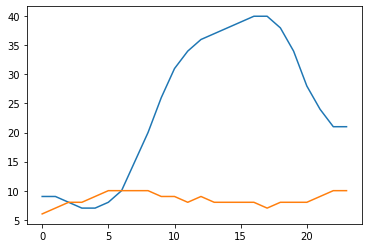

In [153]:
plt.plot(temps)
plt.plot(winds)
plt.show()